# 自製手寫繁體中文圖片測試  


## Step 0: 匯入套件

In [1]:
from platform import python_version
import os
import shutil
import numpy as np
import pandas as pd
import PIL.Image
from matplotlib import pyplot as plt 
'''
繁體中文顯示設定
'''
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  
from tensorflow.keras.optimizers import *

print( 'Python Version: ', python_version() )
print( 'TensorFlow Version: ', tf.__version__ )
print( 'Keras Version: ', tf.keras.__version__ ) 

Python Version:  3.7.6
TensorFlow Version:  2.1.0
Keras Version:  2.2.4-tf


## Step 1: 訓練集與自製測試集路徑

### 自製繁中手寫測試集 :   

利用小畫家自製繁體中文字   
* 底圖大小: 50x50 像素   
* 白底黑字    
* 像素筆線條粗細: 1 像素   

將用小畫家自製的繁中手寫文字，以 png 檔儲存，且放於以該字為名的子資料夾中，如下圖所示:   
![自製繁中手寫資料集](https://raw.githubusercontent.com/AI-FREE-Team/Traditional-Chinese-Handwriting-Dataset/master/img/HomeMade_Traditional_Chinese_Dataset.png)

In [2]:
'''
RawDataPath: 繁中手寫資料集路徑
TraningDataPath: 訓練集路徑
TestingDataPath: 自製繁中手寫資料集路徑
'''
RawDataPath = 'D:/Traditional_Chinese_Data/'
TraningDataPath = 'D:/Traditional_Chinese_Training_Data/'
TestingDataPath = 'D:/Traditional_Chinese_Testing_Data/'

os.chdir( RawDataPath )
print( 'Current working directory:', os.getcwd() ) 

Current working directory: D:\Traditional_Chinese_Data


## Step 2: 訓練集   

從繁體中文手寫資料集中，選擇欲辨識的繁體中文字集，作為訓練集。

In [3]:
SelectedWords = [ '人', '工', '智', '慧' ]

os.chdir( RawDataPath )
try: 
    os.mkdir( TraningDataPath ) 

except:
    shutil.rmtree( TraningDataPath )
    os.mkdir( TraningDataPath ) 

finally: 
    nonexistence = []
    for c in SelectedWords:
        try: 
            shutil.copytree( RawDataPath+'/'+c, TraningDataPath+'/'+c )
        except: 
            nonexistence.append( c )
            
    if len(nonexistence)>1: 
        print( f'There are {len(nonexistence)} characters that are not in dataset. \n{nonexistence}' )
    elif len(nonexistence)==1:
        print( f'There is {len(nonexistence)} character that is not in dataset. \n{nonexistence}' )
    else: print('')

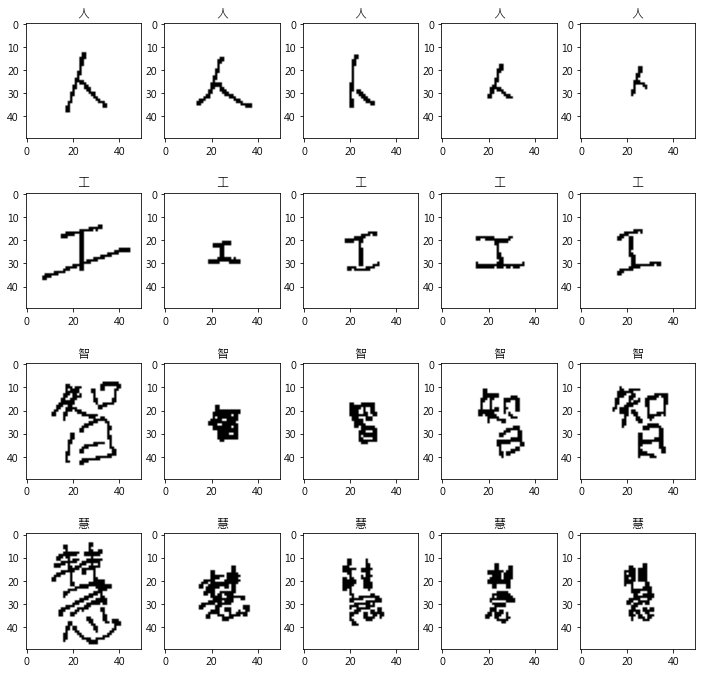

In [4]:
def Loading_Image( image_path ):
    img = load_img( image_path )  
    img = tf.constant( np.array(img) )  
    return img

def Show( image, title=None ) :
    if len( image.shape )>3 :
        image = tf.squeeze( image, axis=0 )   

    plt.imshow( image )
    if title:
        plt.title( title )
        

img_list = []
for c in SelectedWords : 
    folder_path = TraningDataPath+'/'+c
    file_names = os.listdir( folder_path )
    for i in range(5) :
        img_list.append( folder_path+'/'+file_names[i] )

plt.gcf().set_size_inches( (12,12) ) 
for i in range(20):      
    plt.subplot(4,5,i+1)
    title = img_list[i].split('/')[-1].split('_')[-2]
    img = Loading_Image( img_list[i] )
    Show( img, title )

## Step 3: (超)參數

In [5]:
Num_Classes = len(SelectedWords)
Image_Size = ( 50, 50 )
Epochs = 50
Batch_Size = 8

## Step 4: 資料擴增( Data Augmentation ) 

### (4.1) 訓練集

In [6]:
Train_Data_Genetor = ImageDataGenerator( rescale = 1./255, validation_split = 0.2,
                                         width_shift_range = 0.05,   
                                         height_shift_range = 0.05,
                                         zoom_range = 0.1,  
                                         horizontal_flip = False )

In [7]:
Train_Generator = Train_Data_Genetor.flow_from_directory( TraningDataPath ,
                                                          target_size = Image_Size,
                                                          batch_size = Batch_Size,
                                                          class_mode = 'categorical',
                                                          shuffle = True, 
                                                          subset = 'training' )

Found 164 images belonging to 4 classes.


batch 1: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


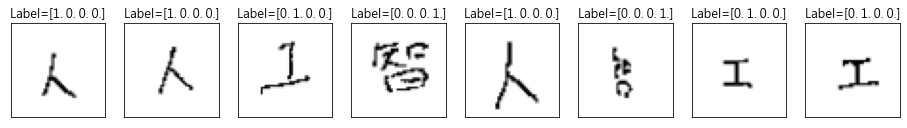

batch 2: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


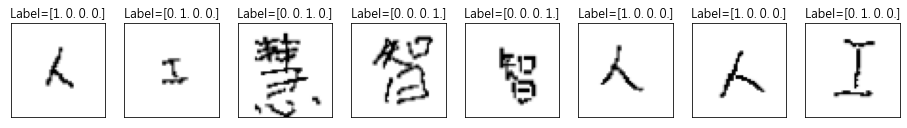

batch 3: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


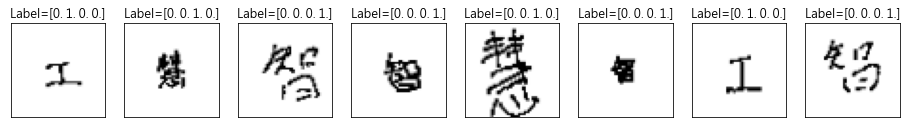

batch 4: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


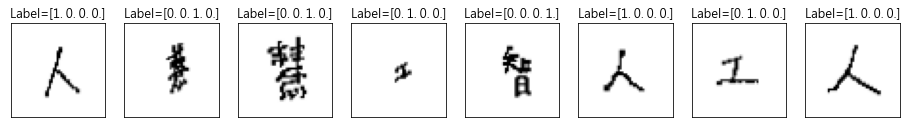

batch 5: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


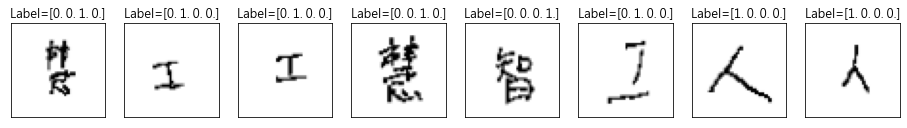

batch 6: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


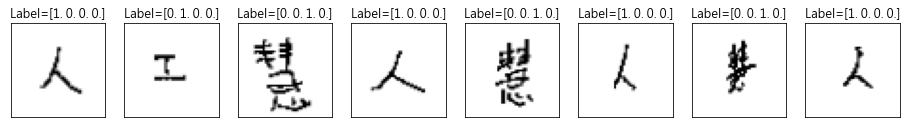

batch 7: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


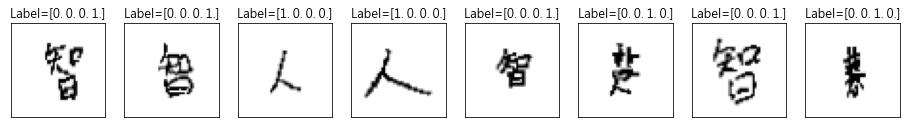

batch 8: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


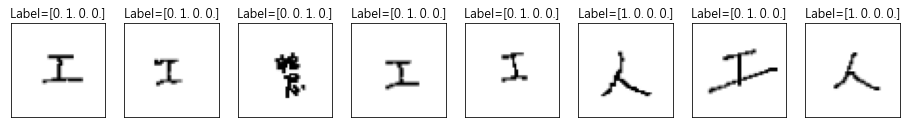

batch 9: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


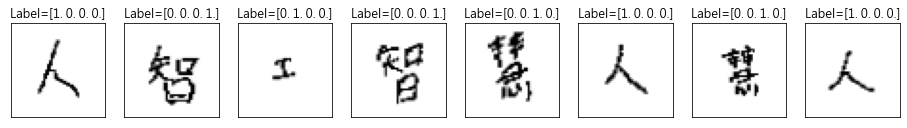

batch 10: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


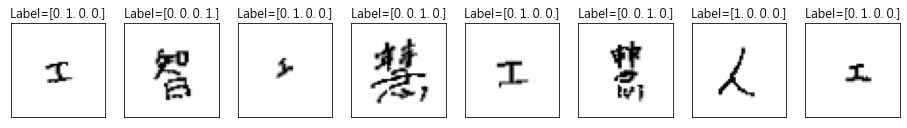

batch 11: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


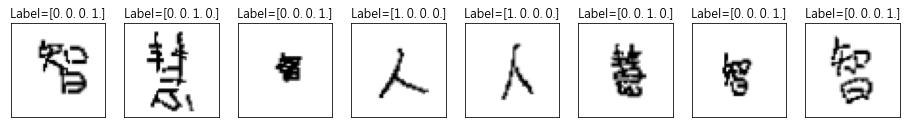

batch 12: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


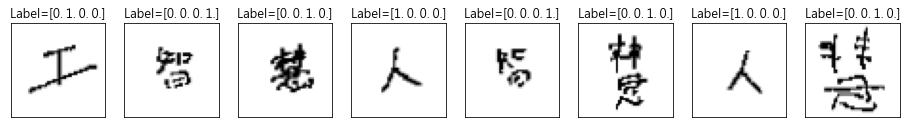

batch 13: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


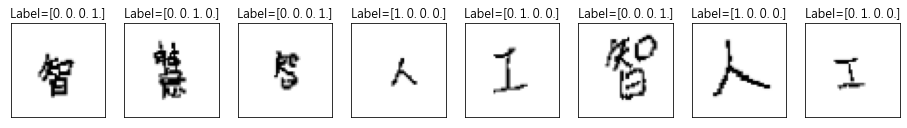

batch 14: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


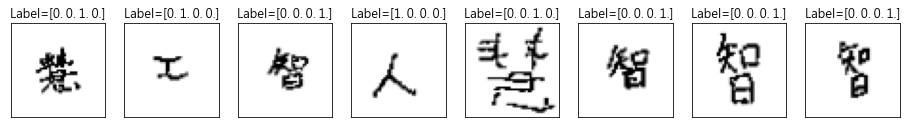

batch 15: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


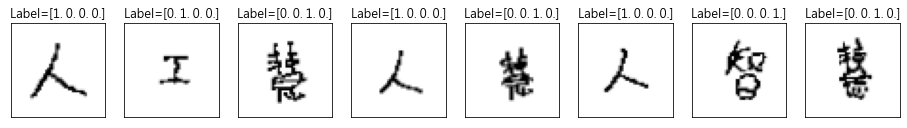

batch 16: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


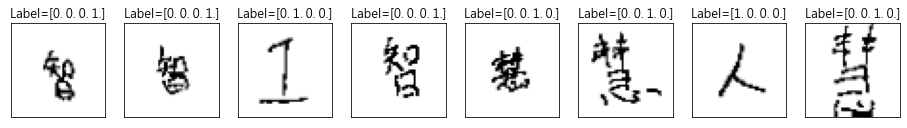

batch 17: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


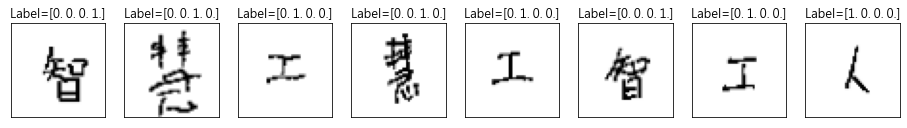

batch 18: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


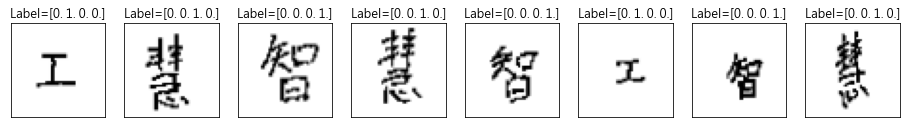

batch 19: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


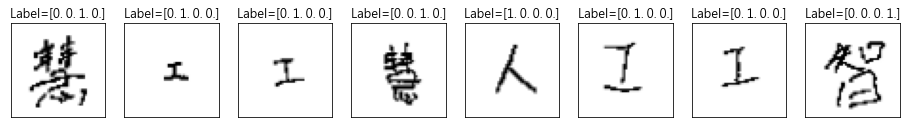

batch 20: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


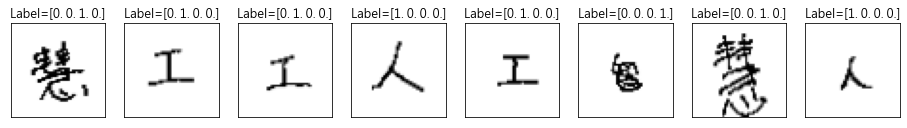

batch 21: 
 shape of images: (4, 50, 50, 3) 
 shape of labels: (4, 4)


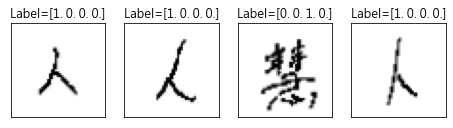

There are 21 batches.


In [8]:
def Plot_Genetor( imgs, labels=[], grid=(1,10), size=(20,2) ):
    n = len( imgs )             
    plt.gcf().set_size_inches(size) 
    for i in range(n):           
        ax = plt.subplot( grid[0], grid[1], i+1 )   
        ax.imshow( imgs[i] )            
        if len(labels):
            ax.set_title( f'Label={labels[i]}' )   
        ax.set_xticks([]); ax.set_yticks([]) 
    plt.show()  

batch = 1
for data, label in Train_Generator:
    print( f'batch {batch}: \n shape of images: {data.shape} \n shape of labels: {label.shape}' )
    Plot_Genetor( data, label )
    batch += 1
    if batch > len(Train_Generator): 
        break

print( f'There are {len(Train_Generator)} batches.' )

### (4.2) 驗證集

In [9]:
Val_Data_Genetor = ImageDataGenerator( rescale=1./255, validation_split = 0.2 )

In [10]:
Val_Generator = Train_Data_Genetor.flow_from_directory( TraningDataPath ,
                                                        target_size = Image_Size,
                                                        batch_size = Batch_Size,
                                                        class_mode = 'categorical',
                                                        shuffle = True, 
                                                        subset = 'validation' )

Found 40 images belonging to 4 classes.


## Step 5: 建立及編譯模型

In [11]:
CNN = Sequential( name = 'CNN_Model' )
CNN.add( Conv2D( 5, kernel_size = (2,2), padding = 'same', 
                 input_shape = (Image_Size[0],Image_Size[1],3), name = 'Convolution' ) )
CNN.add( MaxPooling2D( pool_size = (2,2), name = 'Pooling' ) )
CNN.add( Flatten( name = 'Flatten' ) )
CNN.add( Dropout( 0.5, name = 'Dropout_1' ) )
CNN.add( Dense( 512, activation = 'relu', name = 'Dense' ) )
CNN.add( Dropout( 0.5, name = 'Dropout_2' ) )
CNN.add( Dense( Num_Classes, activation = 'softmax', name = 'Softmax' ) )
CNN.summary()

Model: "CNN_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolution (Conv2D)         (None, 50, 50, 5)         65        
_________________________________________________________________
Pooling (MaxPooling2D)       (None, 25, 25, 5)         0         
_________________________________________________________________
Flatten (Flatten)            (None, 3125)              0         
_________________________________________________________________
Dropout_1 (Dropout)          (None, 3125)              0         
_________________________________________________________________
Dense (Dense)                (None, 512)               1600512   
_________________________________________________________________
Dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
Softmax (Dense)              (None, 4)                 20

In [12]:
CNN.compile( optimizer = Adam(),
             loss = 'categorical_crossentropy', 
             metrics = ['accuracy'] )

## Step 6: 訓練及儲存模型

In [13]:
History = CNN.fit( Train_Generator,
                   steps_per_epoch = Train_Generator.samples//Batch_Size,
                   validation_data = Val_Generator,
                   validation_steps = Val_Generator.samples//Batch_Size,
                   epochs = Epochs )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 5 steps
Epoch 1/50
20/20 [==============================] - 2s 100ms/step - loss: 4.6870 - accuracy: 0.2188 - val_loss: 2.6789 - val_accuracy: 0.4250
Epoch 2/50
20/20 [==============================] - 0s 13ms/step - loss: 2.4889 - accuracy: 0.3333 - val_loss: 1.8228 - val_accuracy: 0.2500
Epoch 3/50
20/20 [==============================] - 0s 11ms/step - loss: 1.8151 - accuracy: 0.3013 - val_loss: 1.2642 - val_accuracy: 0.3750
Epoch 4/50
20/20 [==============================] - 0s 11ms/step - loss: 1.3542 - accuracy: 0.3718 - val_loss: 1.2269 - val_accuracy: 0.3500
Epoch 5/50
20/20 [==============================] - 0s 15ms/step - loss: 1.2568 - accuracy: 0.4231 - val_loss: 1.1407 - val_accuracy: 0.5000
Epoch 6/50
20/20 [==============================] - 0s 15ms/step - loss: 1.1052 - accuracy: 0.5188 - val_loss: 1.0239 - val_accuracy: 0.5750
Epoch 7/50
20/20 [==============================] - 0s 11ms/st

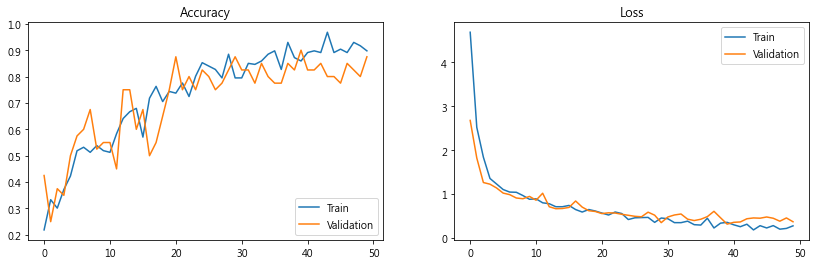

In [14]:
Train_Accuracy = History.history['accuracy']
Val_Accuracy = History.history['val_accuracy']
Train_Loss = History.history['loss']
Val_Loss = History.history['val_loss']
epochs_range = range(Epochs)

plt.figure( figsize=(14,4) )
plt.subplot( 1,2,1 )
plt.plot( range( len(Train_Accuracy) ), Train_Accuracy, label='Train' ) 
plt.plot( range( len(Val_Accuracy) ), Val_Accuracy, label='Validation' ) 
plt.legend( loc='lower right' )
plt.title( 'Accuracy' )

plt.subplot( 1,2,2 )
plt.plot( range( len(Train_Loss) ), Train_Loss, label='Train' )
plt.plot( range( len(Val_Loss) ), Val_Loss, label='Validation' )
plt.legend( loc='upper right' )
plt.title( 'Loss')

plt.show()

### 儲存模型

In [15]:
os.chdir( TraningDataPath )
CNN.save( 'CNN_Model.h5' )

## Step 7: 自製繁中手寫測試集預測

### (7.1) 建立自製測試集的生成器( Generator )及走訪器( Iterator )

In [16]:
Test_Data_Genetor = ImageDataGenerator( rescale=1./255 )
Test_Generator = Test_Data_Genetor.flow_from_directory( TestingDataPath,
                                                        target_size = Image_Size,
                                                        shuffle = False,
                                                        class_mode = 'categorical' )

Found 8 images belonging to 4 classes.


batch 1: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


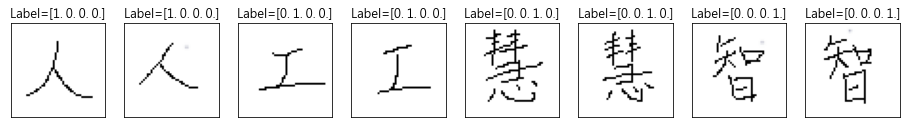

In [17]:
batch = 1
for data, label in Test_Generator:
    print( f'batch {batch}: \n shape of images: {data.shape} \n shape of labels: {label.shape}' )
    Plot_Genetor( data, label )
    batch += 1
    if batch > 1: 
        break

### (7.2) 載入模型且預測

In [18]:
CNN = load_model( 'CNN_Model.h5' ) # Loading pretrained model
Predicts = CNN.predict( Test_Generator )

### (7.3) 檢視預測結果

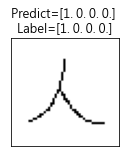

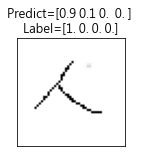

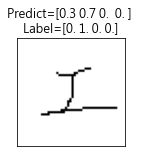

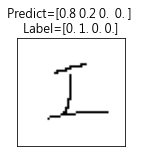

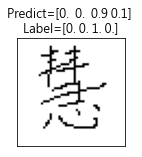

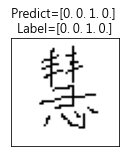

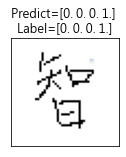

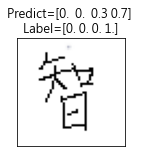

In [19]:
test_data, test_label = Test_Generator.next()

def Plot_Predict( img, labels=[], predicts=[], size=(20,2) ):             
    plt.gcf().set_size_inches(size)           
    ax = plt.subplot( )   
    ax.imshow( img )            
    ax.set_title( f'Predict={predicts.round(1)} \nLabel={labels}' )   
    ax.set_xticks([]); ax.set_yticks([]) 
    plt.show() 
    
for data, label, predict_label in zip(test_data,  test_label, Predicts):
    Plot_Predict( data, label, predict_label )